## Assignment 2- Data Wrangling II

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("StudentsPerformance_modified.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72.0,74.0
1,female,group C,some college,standard,completed,69,90.0,88.0
2,female,group B,master's degree,standard,none,90,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,47,57.0,44.0
4,male,group C,some college,standard,none,76,78.0,75.0


In [3]:
df1 = df.copy()
df1.shape

(1000, 8)

In [4]:
df1.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     8
reading score                  6
writing score                  9
dtype: int64

In [5]:
df1.dropna(inplace=True)
df1.shape

(978, 8)

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 978 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       978 non-null    object 
 1   race/ethnicity               978 non-null    object 
 2   parental level of education  978 non-null    object 
 3   lunch                        978 non-null    object 
 4   test preparation course      978 non-null    object 
 5   math score                   978 non-null    object 
 6   reading score                978 non-null    float64
 7   writing score                978 non-null    float64
dtypes: float64(2), object(6)
memory usage: 68.8+ KB


In [7]:
df1.drop(df1[df1["math score"]=="?"].index, inplace=True)
df1.shape

(943, 8)

In [8]:
df1["math score"] = df1["math score"].astype("int64")
df1["math score"].dtype

dtype('int64')

In [9]:
df1.drop(df1[df1["math score"]<0].index, inplace=True)
df1.shape

(942, 8)

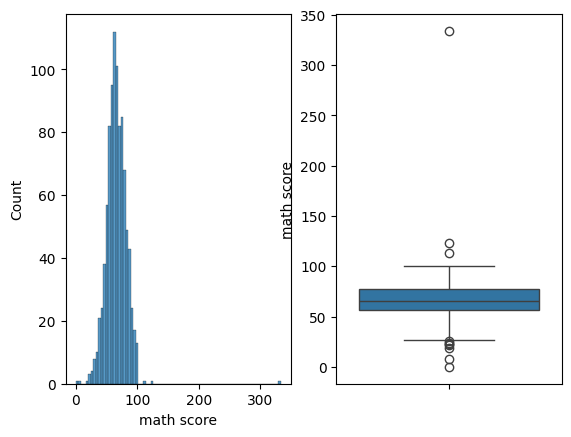

In [10]:
plt.subplot(1,2,1)
sns.histplot(df1["math score"])

plt.subplot(1,2,2)
sns.boxplot(df1["math score"])

plt.show()

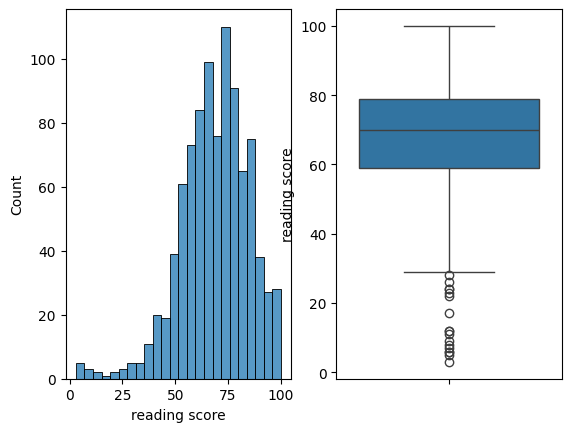

In [11]:
plt.subplot(1,2,1)
sns.histplot(df1["reading score"])

plt.subplot(1,2,2)
sns.boxplot(df1["reading score"])

plt.show()

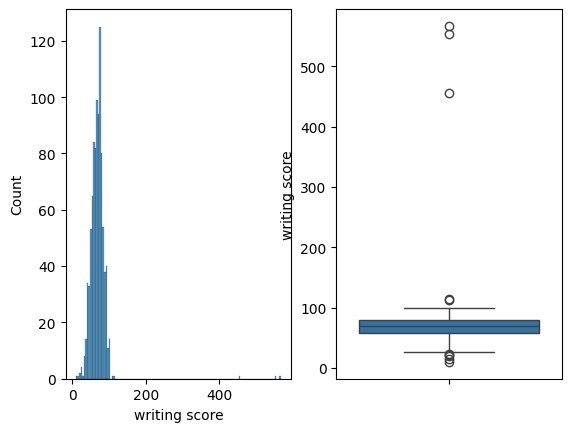

In [12]:
plt.subplot(1,2,1)
sns.histplot(df1["writing score"])

plt.subplot(1,2,2)
sns.boxplot(df1["writing score"])

plt.show()

In [13]:
# Outliers - An outlier is a data point that significantly deviates from the rest of the data. It can be either much higher or much lower than the other data points, and its presence can have a significant impact on the results of machine learning algorithms.
# Outliers Detection Methods - 1. Z-Score 2. Interquartile range

In [14]:
# Z-Score

df2 = df1.copy()
columns = ["math score", "reading score", "writing score"]

# Using Formula
for column in columns:
    df2[column] = (df2[column]-df2[column].mean())/df2[column].std()

    # Detect & Remove Outliers
    df2.drop(df2[df2[column] > 3].index, inplace=True)
    df2.drop(df2[df2[column] < -3].index, inplace=True)

# Using Scipy
# from scipy.stats import zscore
# for column in columns:
#     df2[column] = zscore(df2[column])

df2.shape

(925, 8)

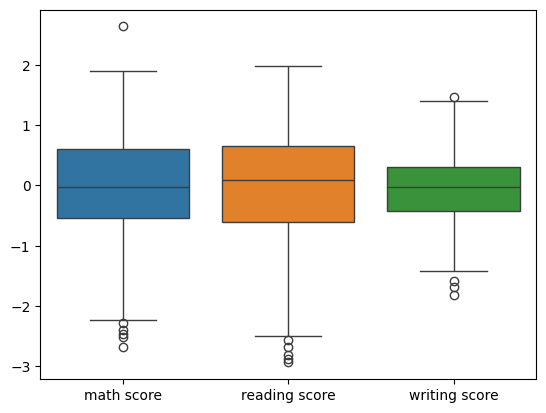

In [15]:
sns.boxplot(df2)
plt.show()

In [16]:
# Interquartile Range

df3 = df1.copy()
columns = ["math score", "reading score", "writing score"]

for column in columns: 
    Q1 = df3[column].quantile(0.25)
    Q3 = df3[column].quantile(0.75)
    
    IQR = Q3-Q1 
    
    min_range = Q1-1.5*IQR
    max_range = Q3+1.5*IQR

    # Detect & Remove Outliers
    df3.drop(df3[df3[column] < min_range].index, inplace=True)
    df3.drop(df3[df3[column] > max_range].index, inplace=True)

df3.shape

(912, 8)

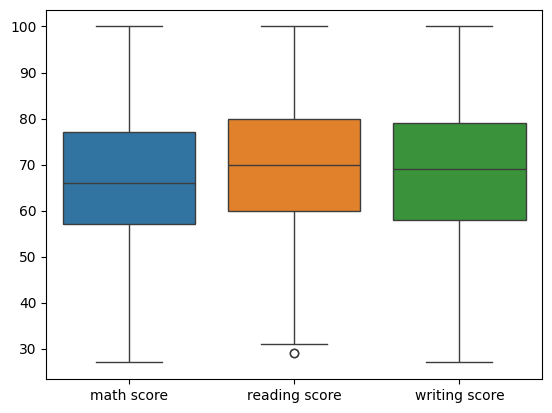

In [17]:
sns.boxplot(df3)
plt.show()

In [18]:
# Data Transformation - Scaling

# Normalization
df4 = df3.copy()
columns = ["math score", "reading score", "writing score"]

# 1. Min-Max Normalization - It rescales the values of a numerical variable to a fixed range, typically between 0 and 1
for column in columns:
    df4[column] = (df4[column]-df4[column].min())/(df4[column].max()-df4[column].min())

# Using scikit-learn
# from sklearn.preprocessing import MinMaxScaler 
# ms = MinMaxScaler()
# for column in columns:
#     df4[column] = ms.fit_transform(df4[[column]])


# 2. Z-score Normalization (Standardization) - It transforms the values of a numerical variable to have a mean of 0 and a standard deviation of 1
# for column in columns:
#     df4[column] = (df4[column]-df4[column].mean())/df4[column].std()

# Using scikit-learn
# from sklearn.preprocessing import StandardScaler 
# ss = StandardScaler()
# for column in columns:
#     df4[column] = ss.fit_transform(df4[[column]])

df4

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,0.616438,0.605634,0.643836
1,female,group C,some college,standard,completed,0.575342,0.859155,0.835616
2,female,group B,master's degree,standard,none,0.863014,0.929577,0.904110
3,male,group A,associate's degree,free/reduced,none,0.273973,0.394366,0.232877
4,male,group C,some college,standard,none,0.671233,0.690141,0.657534
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,0.835616,0.985915,0.931507
996,male,group C,high school,free/reduced,none,0.479452,0.366197,0.383562
997,female,group C,high school,free/reduced,completed,0.438356,0.591549,0.520548
998,female,group D,some college,standard,completed,0.561644,0.690141,0.684932


In [19]:
df4.describe()

,math score,reading score,writing score
count,912.000000,912.000000,912.000000
mean,0.541471,0.571256,0.568944
std,0.199032,0.199089,0.199724
min,0.000000,0.000000,0.000000
25%,0.410959,0.436620,0.424658
50%,0.534247,0.577465,0.575342
75%,0.684932,0.718310,0.712329
max,1.000000,1.000000,1.000000


In [20]:
df4.to_csv("result.csv")